# import libraries

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy 
import matplotlib.pyplot as plt
from torchvision import models
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score

Matplotlib is building the font cache; this may take a moment.


# training and testing functions

In [2]:
def train_model(train_loader,learning_rate,num_epochs):
    model.fc = nn.Linear(model.fc.in_features,num_classes)
    model.to(device)
    criterion = nn.CrossEntropyL    oss()
    optimizer = torch.optim.Adam(model.parameters(),lr=learning_rate)
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        for images,labels in train_loader:
            images = images.to(device)
            labels = labels.to(device)
            
            outputs = model(images)
            
            loss = criterion(outputs,labels)
    
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
    
            running_loss += loss
        print(f"Epoch : [{epoch}/{num_epochs}] loss : {running_loss/len(train_loader):.4f})")

def test_model(test_loader,model):
    model.eval()
    correct = 0
    total = 0
    predicted_labels = []
    true_labels = []
    with torch.no_grad():
        for images,labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _,predicted = torch.max(outputs.data,1)
            total+=labels.size(0)
            correct += (predicted == labels).sum().item()
            
            predicted_labels.extend(predicted.to('cpu'))
            true_labels.extend(labels.to('cpu'))

    
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy:.2f}%")
    return (predicted_labels,true_labels)              

# setting the device for execution - gpu or cpu

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# hyperparameters

In [4]:
num_classes = 10
num_epochs = 10
batch_size = 32
learning_rate =0.0001

# pre processing functions

In [5]:
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

## downloading public dataset - CIFAR10

In [6]:
train_dataset = datasets.CIFAR10(root='./data', train=True, transform=train_transforms, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=test_transforms, download=True)

100%|██████████| 170M/170M [00:26<00:00, 6.48MB/s] 


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


# loading dataset by batch size to be used by pytorch for training and testing

In [7]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)


# loading ResNet18 model

In [8]:
model = models.resnet18(pretrained=True)

/home/rohithk/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rohithk/miniconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /home/rohithk/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:02<00:00, 19.2MB/s]


# training the model

In [9]:
train_model(train_loader,learning_rate,num_epochs)

Epoch : [0/10] loss : 0.9977)
Epoch : [1/10] loss : 0.6201)
Epoch : [2/10] loss : 0.4781)
Epoch : [3/10] loss : 0.3641)
Epoch : [4/10] loss : 0.2836)
Epoch : [5/10] loss : 0.2209)
Epoch : [6/10] loss : 0.1744)
Epoch : [7/10] loss : 0.1452)
Epoch : [8/10] loss : 0.1225)
Epoch : [9/10] loss : 0.1033)


# testing the model


In [10]:
predictedLabels,trueLabels = test_model(test_loader,model)

Test Accuracy: 82.28%


# plotting confusion matrix

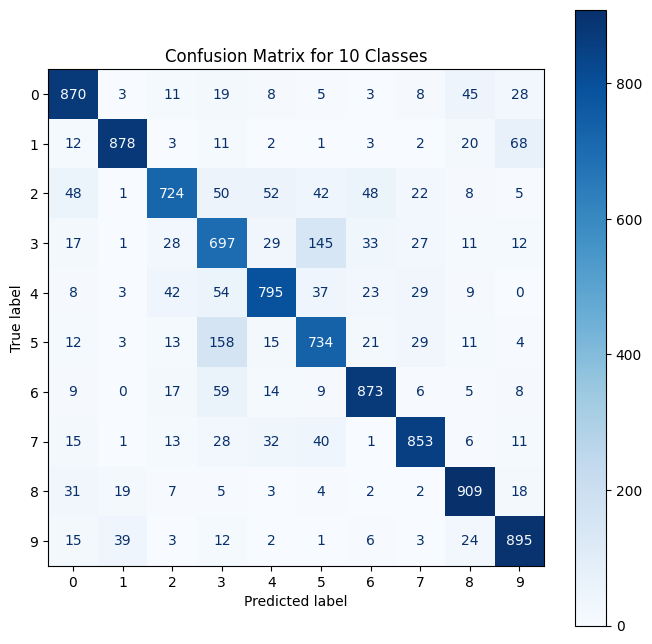

In [11]:
cm = confusion_matrix(trueLabels, predictedLabels)
fig, ax = plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=range(10))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix for 10 Classes")
plt.show()


# calculating f1 score

In [12]:
f1_score_data = f1_score(trueLabels, predictedLabels,average=None)
for i in f1_score_data:
    print(f'Class {numpy.where(f1_score_data==i)[0][0]} : {i}')

Class 0 : 0.8541973490427098
Class 1 : 0.9014373716632443
Class 2 : 0.7780763030628695
Class 3 : 0.6660296225513617
Class 4 : 0.8145491803278688
Class 5 : 0.7274529236868187
Class 6 : 0.8673621460506706
Class 7 : 0.8611812216052499
Class 8 : 0.8876953125
Class 9 : 0.8735968765251342


# update batch size

In [13]:
batch_size = 64 # previously 32

# update dataloader to set the updated batch size

In [14]:
train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=batch_size,shuffle=False)

# training the model

In [15]:
train_model(train_loader,learning_rate,num_epochs)

Epoch : [0/10] loss : 0.1211)
Epoch : [1/10] loss : 0.0451)
Epoch : [2/10] loss : 0.0385)
Epoch : [3/10] loss : 0.0348)
Epoch : [4/10] loss : 0.0290)
Epoch : [5/10] loss : 0.0324)
Epoch : [6/10] loss : 0.0256)
Epoch : [7/10] loss : 0.0337)
Epoch : [8/10] loss : 0.0246)
Epoch : [9/10] loss : 0.0200)


# testing the model

In [16]:
predictedLabels,trueLabels = test_model(test_loader,model)

Test Accuracy: 83.38%


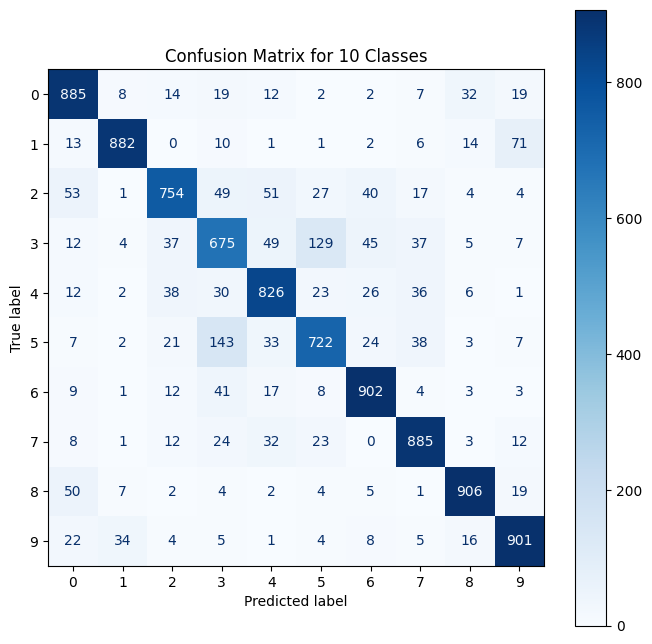

In [17]:
cm = confusion_matrix(trueLabels, predictedLabels)
fig, ax = plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=range(10))
disp.plot(ax=ax, cmap='Blues', colorbar=True)
plt.title("Confusion Matrix for 10 Classes")
plt.show()


In [18]:
f1_score_data = f1_score(trueLabels, predictedLabels,average=None)
for i in f1_score_data:
    print(f'Class {numpy.where(f1_score_data==i)[0][0]} : {i}')

Class 0 : 0.8546595847416707
Class 1 : 0.9083419155509783
Class 2 : 0.7961985216473073
Class 3 : 0.675
Class 4 : 0.8162055335968379
Class 5 : 0.7431806484817293
Class 6 : 0.878286270691334
Class 7 : 0.869351669941061
Class 8 : 0.9096385542168675
Class 9 : 0.8816046966731899
